In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import random

Linear regression - creating a hyperplane that can predict value A (target) based on value(s) B (features). Computer will calculate such hyperplane that should minimize the loss function (By default MSE) - function that how well it fits training data.

Text(0, 0.5, 'target')

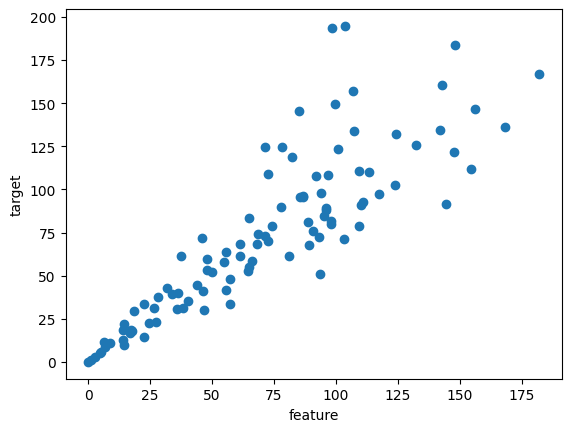

In [41]:
%matplotlib inline

# Creating random data with visible linear dependence in order to apply linear regression
feature = np.array([random.random()*i+i for i in range(100)])
target = np.array([random.random()*i+i for i in range(100)])
plt.scatter( feature, target )
plt.xlabel('feature')
plt.ylabel('target')

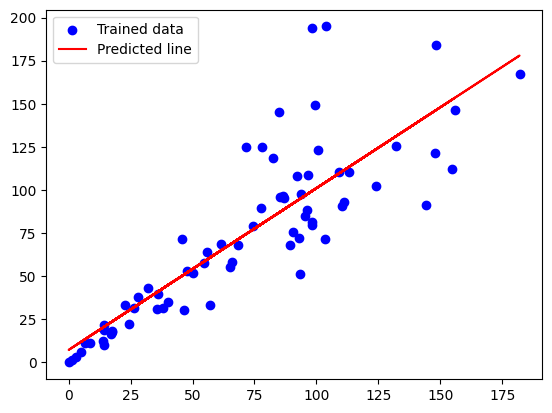

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( feature.reshape(-1, 1), target, train_size=0.7, random_state= 120 )

#The loss function is MSE for Linear regression, it will try to minimize it
model = linear_model.LinearRegression()
model.fit( X_train, y_train )
line = X_train * model.coef_ + model.intercept_ # line => y = k*x + b
plt.scatter( X_train, y_train, c = 'blue', label = 'Trained data' )
plt.plot( X_train, line, c = 'red', label = 'Predicted line' )
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#metrics
def metrics( model, X_test, y_test, y_pred ):
    mae = mean_absolute_error( y_test, y_pred )
    mse = mean_squared_error( y_test, y_pred )
    score = model.score( X_test, y_test )
    print( "MSE = {:.2f}, MAE = {:.2f}, Score_R^2 = {:.2f}%".format(mae, mse, score*100))


y_pred = model.predict( X_test )
metrics( model, X_test, y_test, y_pred )

MSE = 13.88, MAE = 315.30, Score_R2 = 82.50%


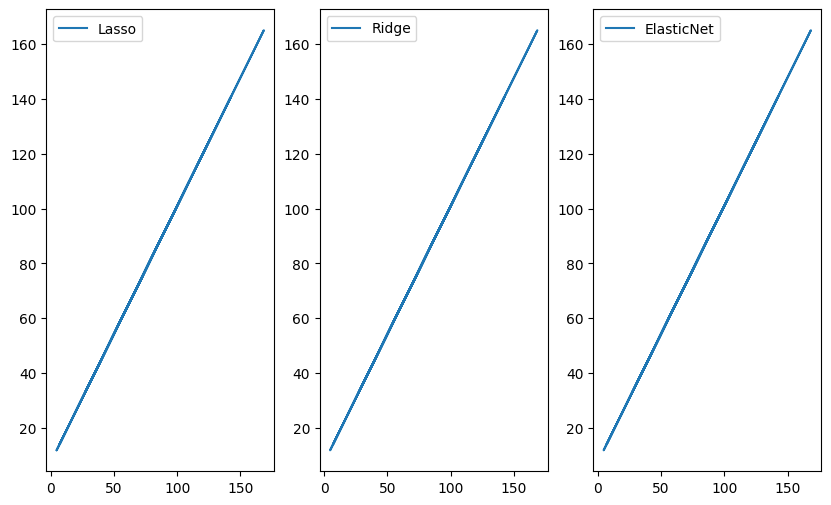

Lasso : y = 7.35 + 0.94 * x
Ridge : y = 7.29 + 0.94 * x
ElasticNet : y = 7.51 + 0.93 * x


In [44]:
# CV = cross-validating method,  Regularizer - method that helps to avoid overfitting
# usually we need to set alpha for the Regularizer, but here we are using CV method that will identify alpha 
model_L1_LassoCV = linear_model.LassoCV( cv = 10 ).fit( X_train, y_train )
model_L2_RidgeCV = linear_model.RidgeCV( cv = 10 ).fit( X_train, y_train )
model_ElasticNetCV = linear_model.ElasticNetCV( cv = 10, l1_ratio=0.5, selection = 'random' ).fit( X_train, y_train ) # Combined L1, L2 as regularizer

# Regularizers makes our model less sensitive for the training data because they use penalty
# CV method need to identify best alpha (hyperparameter)
y_pred_Lasso = model_L1_LassoCV.predict(X_test)
y_pred_Ridge = model_L2_RidgeCV.predict(X_test)
y_pred_ElasticNet = model_ElasticNetCV.predict(X_test)

plt.figure(figsize=(10, 6))
plt.subplot(1,3,1)
plt.plot( X_test, y_pred_Lasso, label = 'Lasso')
plt.legend()
plt.subplot(1,3,2)
plt.plot( X_test, y_pred_Lasso, label = 'Ridge')
plt.legend()
plt.subplot(1,3,3)
plt.plot( X_test, y_pred_Lasso, label = 'ElasticNet')
plt.legend()
plt.show()

print( 'Lasso : y = {:.2f} + {:.2f} * x'.format(model_L1_LassoCV.intercept_, *model_L1_LassoCV.coef_))
print( 'Ridge : y = {:.2f} + {:.2f} * x'.format(model_L2_RidgeCV.intercept_, *model_L2_RidgeCV.coef_))
print( 'ElasticNet : y = {:.2f} + {:.2f} * x'.format(model_ElasticNetCV.intercept_, *model_ElasticNetCV.coef_))

In [45]:
#metrics
metrics( model_L1_LassoCV, X_test, y_test, y_pred_Lasso )
metrics( model_L2_RidgeCV, X_test, y_test, y_pred_Ridge )
metrics( model_ElasticNetCV, X_test, y_test, y_pred_ElasticNet )

MSE = 13.88, MAE = 315.31, Score_R2 = 82.50%
MSE = 13.88, MAE = 315.30, Score_R2 = 82.50%
MSE = 13.88, MAE = 315.35, Score_R2 = 82.49%


Because I made predictions based on single parameter these regularizers are not much different from simple one, but it can be helpful if I have a lot of parameters or more complex data.